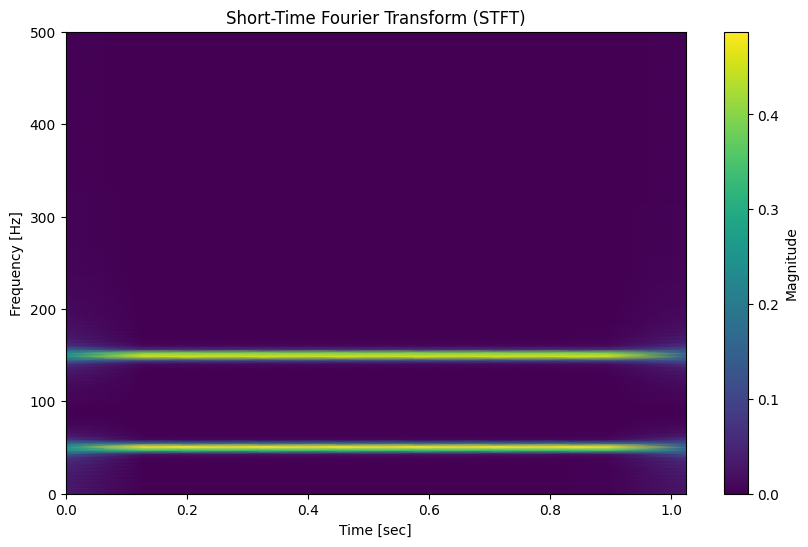

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# Create a sample signal
fs = 1000  # Sampling frequency
t = np.arange(0, 1.0, 1.0/fs)  # Time vector
f1, f2 = 50, 150  # Frequencies for the two sinusoids
signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

# Parameters for STFT
window_size = 256  # Size of each window
overlap = window_size // 2  # Overlap between windows

# Compute STFT
frequencies, times, Zxx = stft(signal, fs, nperseg=window_size, noverlap=overlap)

# Plot the STFT result
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Short-Time Fourier Transform (STFT)')
plt.colorbar(label='Magnitude')
plt.show()


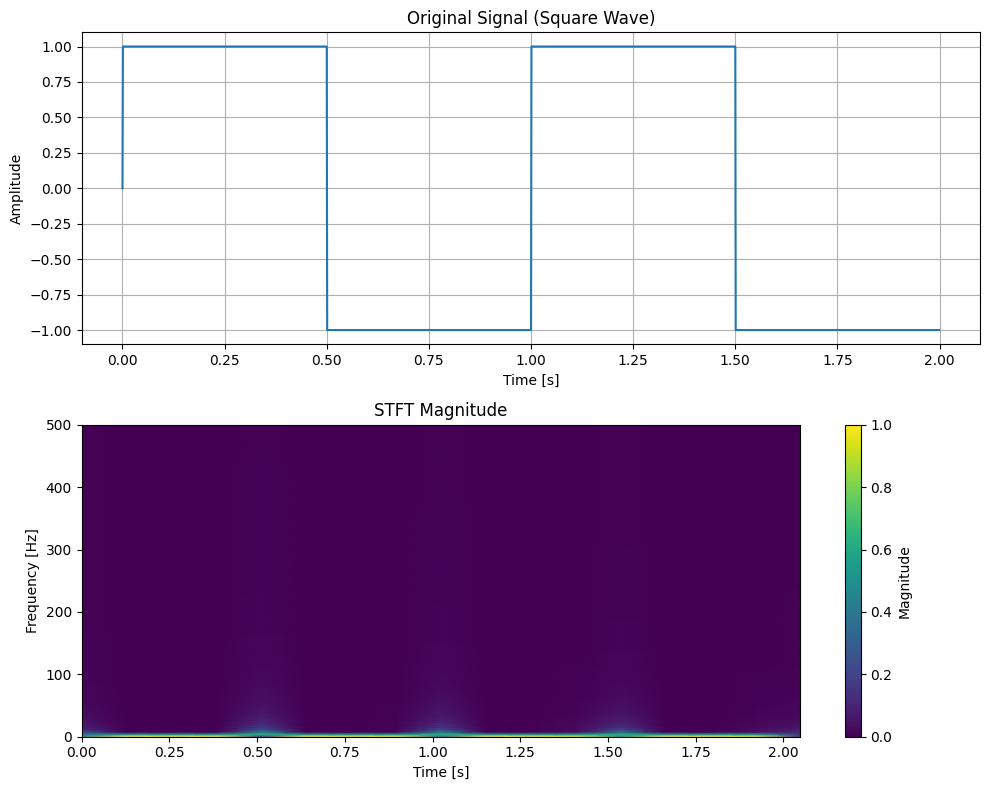

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# Define the square wave function
def square_wave(t, T):
    return np.sign(np.sin(2 * np.pi * t / T))

# Parameters
T = 1  # Period of the square wave (1 second)
fs = 1000  # Sampling frequency (1000 samples per second)
t = np.arange(0, 2 * T, 1/fs)  # Time array over 2 periods

# Generate the square wave
square_wave_signal = square_wave(t, T)

# Short-Time Fourier Transform
window = 'hann'  # Window type
nperseg = 256  # Length of each segment
noverlap = nperseg // 2  # Number of points to overlap between segments

frequencies, times, Zxx = stft(square_wave_signal, fs, window=window, nperseg=nperseg, noverlap=noverlap)

# Plotting
plt.figure(figsize=(10, 8))

# Original signal
plt.subplot(2, 1, 1)
plt.plot(t, square_wave_signal)
plt.title('Original Signal (Square Wave)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# STFT spectrogram
plt.subplot(2, 1, 2)
plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Magnitude')
plt.tight_layout()
plt.show()


In [2]:
#@title Import Library
import numpy as np
from numpy import (sin, cos, pi)
import matplotlib.pyplot as plt
from scipy.fftpack import (fft, fftfreq)
from scipy.signal import windows

print('Imported successfully')

Imported successfully


In [ ]:
#Generate Signal & Display

Section-1	DC : 2
Section-2	DC : 0, AC-Peak : 5
Section-3	DC : 7, AC-Peak : 4
Section-4	DC : 0, AC-Peak : 5
Total points : 1024


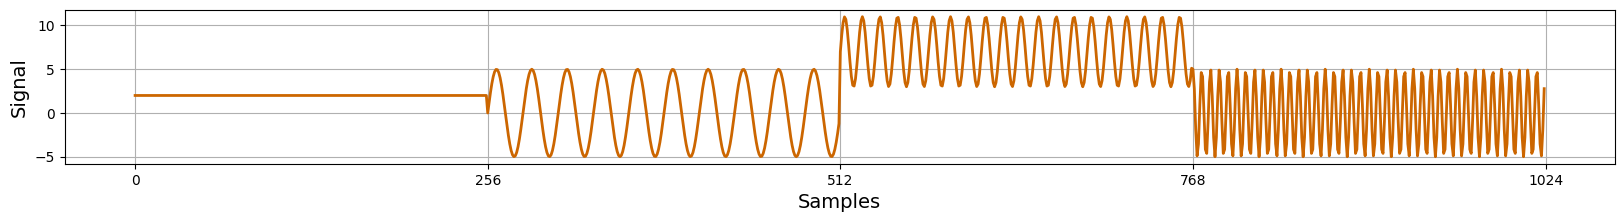

In [4]:
#@title Run Section
x=np.empty((0,1))

N=256
# DC signal
dc=2
val=dc*np.ones((N,1))
x=np.append(x,val,axis=0)
print('Section-1\tDC : {}'.format(dc))

# Sine wave 
m=10
A=5
n=np.arange(0,N)
val=A*sin(m*2*pi*n/N).reshape(N,1)
x=np.append(x,val,axis=0)
print('Section-2\tDC : {}, AC-Peak : {}'.format(0,A))

# Sine wave + DC
m=20
dc=7
A=4
n=np.arange(0,N)
val=dc+A*sin(m*2*pi*n/N).reshape(N,1)
x=np.append(x,val,axis=0)
print('Section-3\tDC : {}, AC-Peak : {}'.format(dc,A))

# Cosine wave
m=40
A=5
n=np.arange(0,N)
val=A*cos(m*2*pi*n/N).reshape(N,1)
x=np.append(x,val,axis=0)
print('Section-4\tDC : {}, AC-Peak : {}'.format(0,A))

print('Total points : {}'.format(x.size))

plt.figure(figsize=(20,2))
plt.plot(x,color=[0.8,0.4,0],lw=2)
plt.xticks(ticks=np.arange(0,x.size+1,N))
plt.ylabel('Signal',fontsize=14)
plt.xlabel('Samples',fontsize=14)
plt.grid()
plt.show()
     


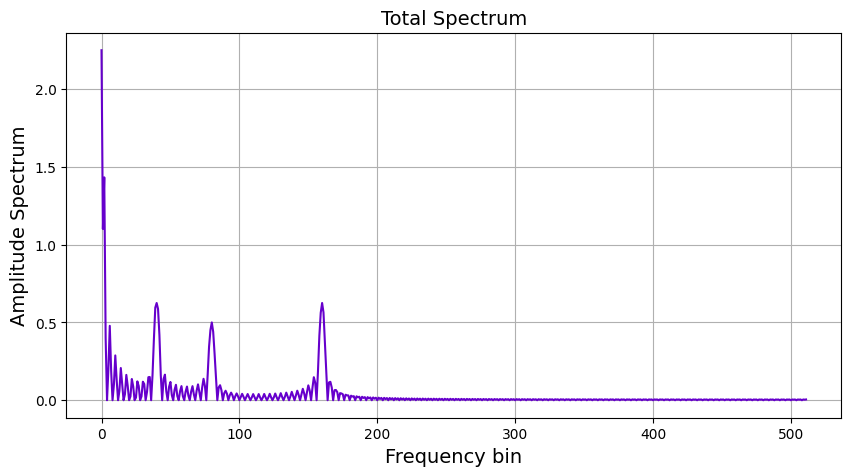

In [5]:

#Full Signal Spectrum Analysis


#@title Run section
Nfft=x.size

X=fft(x,axis=0)
X=X/Nfft
F=fftfreq(Nfft)

F_disp_id=np.where(F>=0)
plt.figure(figsize=(10,5))
plt.plot(np.absolute(X[F_disp_id]),color=[0.4,0,0.8])
plt.ylabel('Amplitude Spectrum',fontsize=14)
plt.xlabel('Frequency bin',fontsize=14)
plt.title('Total Spectrum',fontsize=14)
plt.grid()

plt.show()
     

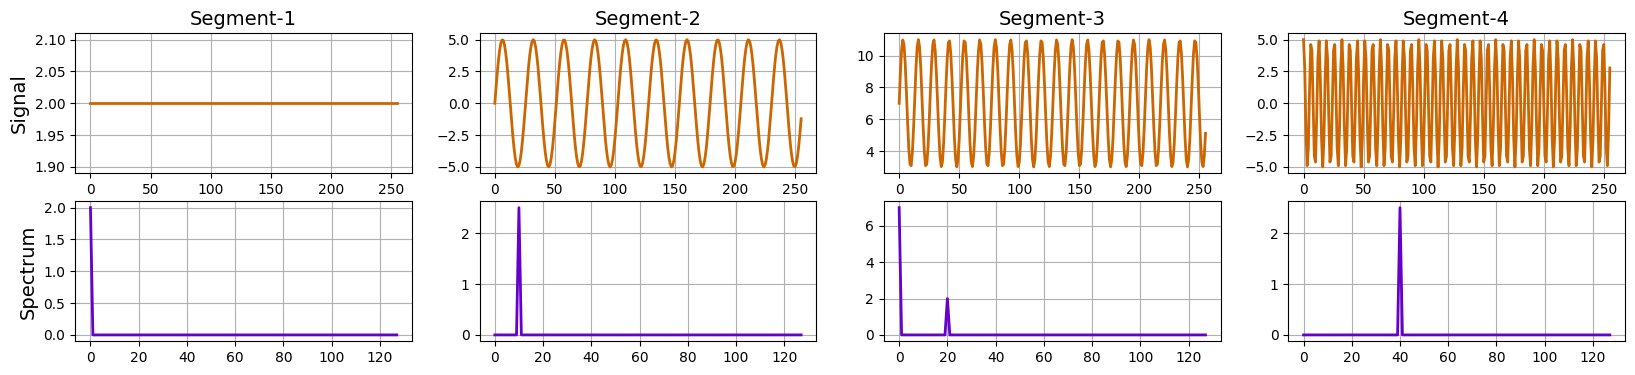

In [6]:
#Sectional Signal Spectrum

#@title Run Section
segments=int(x.size/N)
Nfft=N
F=fftfreq(Nfft)
F_disp_id=np.where(F>=0)

plt.figure(figsize=(20,4))
startId=0
endId=startId+N
for i in range(segments):
    data=x[startId:endId,0]

    DATA=fft(data,axis=0)
    DATA=DATA/Nfft

    plt.subplot(2,segments,i+1)
    plt.plot(data,lw=2,color=[0.8,0.4,0])
    plt.grid()
    if i==0:
        plt.ylabel('Signal',fontsize=14)
    plt.title('Segment-'+str(i+1),fontsize=14)


    plt.subplot(2,segments,i+1+segments)
    plt.plot(np.absolute(DATA[F_disp_id]),lw=2,color=[0.4,0,0.8])
    plt.grid()
    if i==0:
        plt.ylabel('Spectrum',fontsize=14)
    
    
    # update id:
    startId=endId
    endId=startId+N

plt.show()

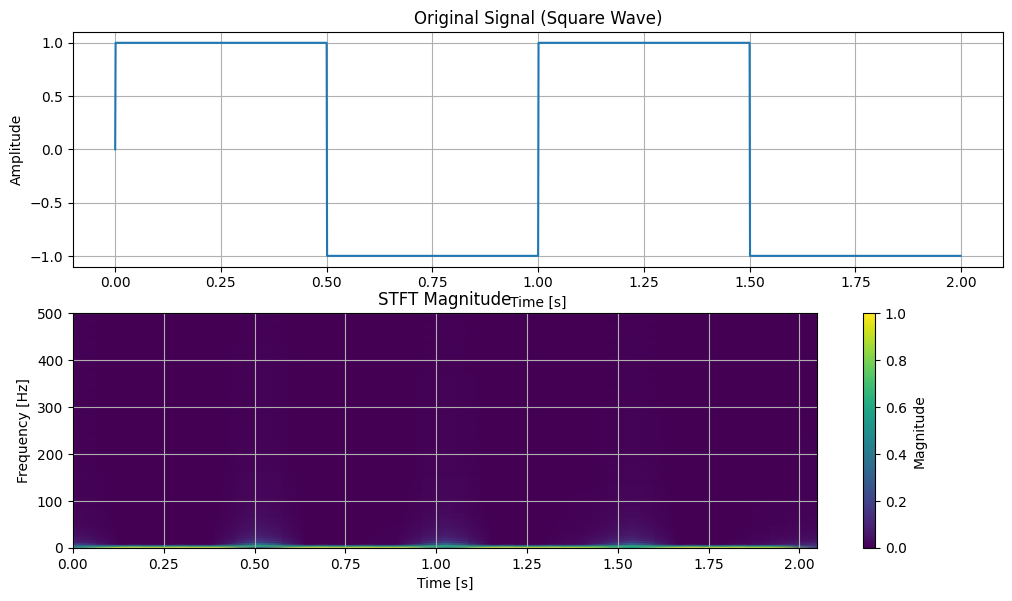

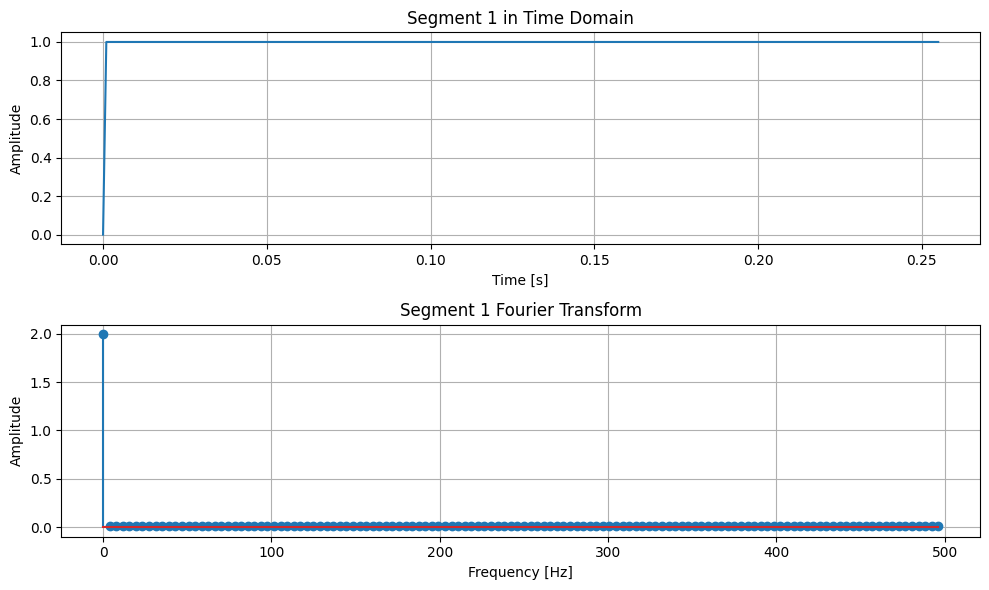

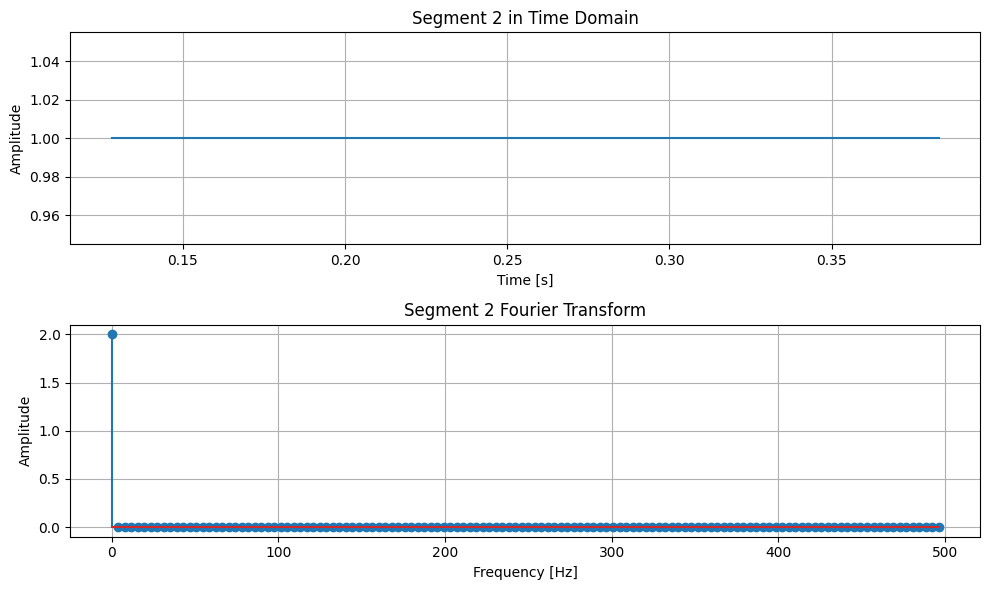

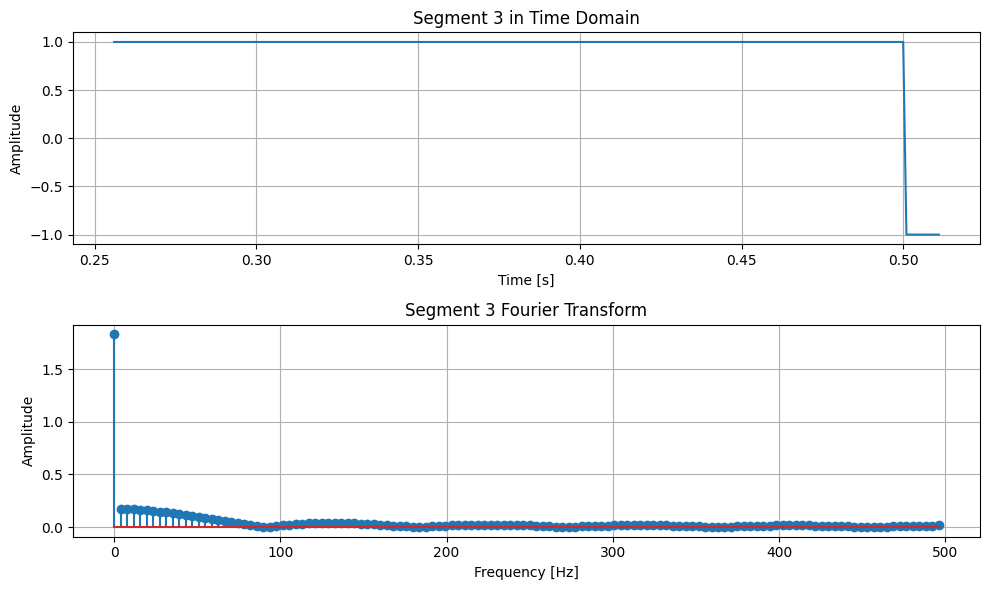

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft
from scipy.fft import fft, fftfreq

# Define the square wave function
def square_wave(t, T):
    return np.sign(np.sin(2 * np.pi * t / T))

# Parameters
T = 1  # Period of the square wave (1 second)
fs = 1000  # Sampling frequency (1000 samples per second)
t = np.arange(0, 2 * T, 1/fs)  # Time array over 2 periods

# Generate the square wave
square_wave_signal = square_wave(t, T)

# Short-Time Fourier Transform
window = 'hann'  # Window type
nperseg = 256  # Length of each segment
noverlap = nperseg // 2  # Number of points to overlap between segments

frequencies, times, Zxx = stft(square_wave_signal, fs, window=window, nperseg=nperseg, noverlap=noverlap)

# Plotting
plt.figure(figsize=(12, 14))

# Original signal
plt.subplot(4, 1, 1)
plt.plot(t, square_wave_signal)
plt.title('Original Signal (Square Wave)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# STFT spectrogram
plt.subplot(4, 1, 2)
plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Magnitude')
plt.grid(True)

# Analyze individual segments
segment_indices = [0, 1, 2]  # Indices of segments to analyze

for i, seg_idx in enumerate(segment_indices):
    start_idx = seg_idx * (nperseg - noverlap)
    end_idx = start_idx + nperseg
    segment = square_wave_signal[start_idx:end_idx]
    segment_t = t[start_idx:end_idx]
    
    # Fourier Transform of the segment
    segment_f_transform = fft(segment)
    segment_freqs = fftfreq(nperseg, 1/fs)
    segment_amplitude = np.abs(segment_f_transform) / nperseg * 2  # Normalize
    
    # Plot the segment
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(segment_t, segment)
    plt.title(f'Segment {seg_idx + 1} in Time Domain')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    
    # Plot the Fourier Transform of the segment
    plt.subplot(2, 1, 2)
    plt.stem(segment_freqs[:nperseg//2], segment_amplitude[:nperseg//2])
    plt.title(f'Segment {seg_idx + 1} Fourier Transform')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


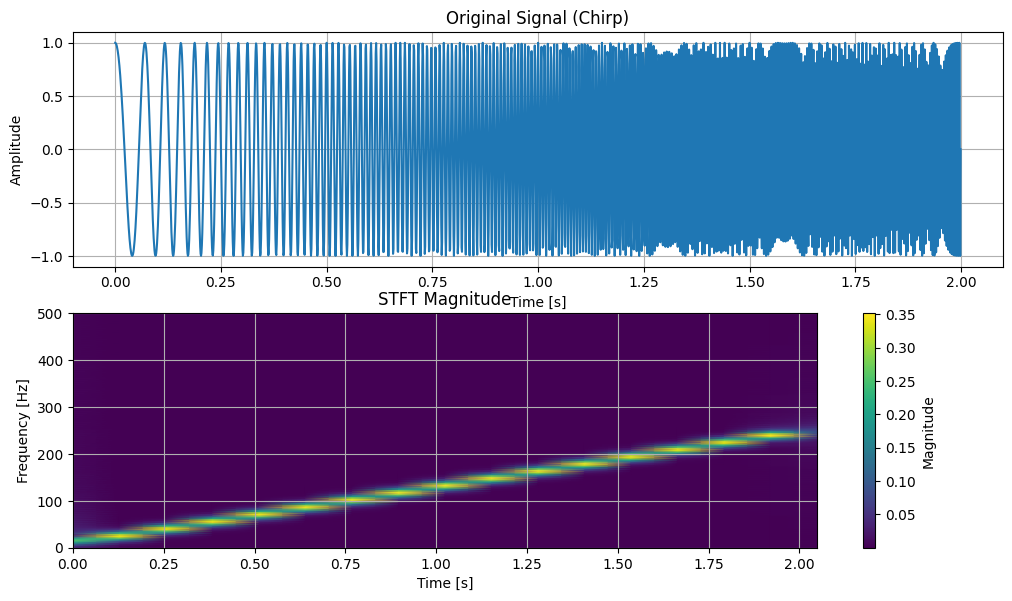

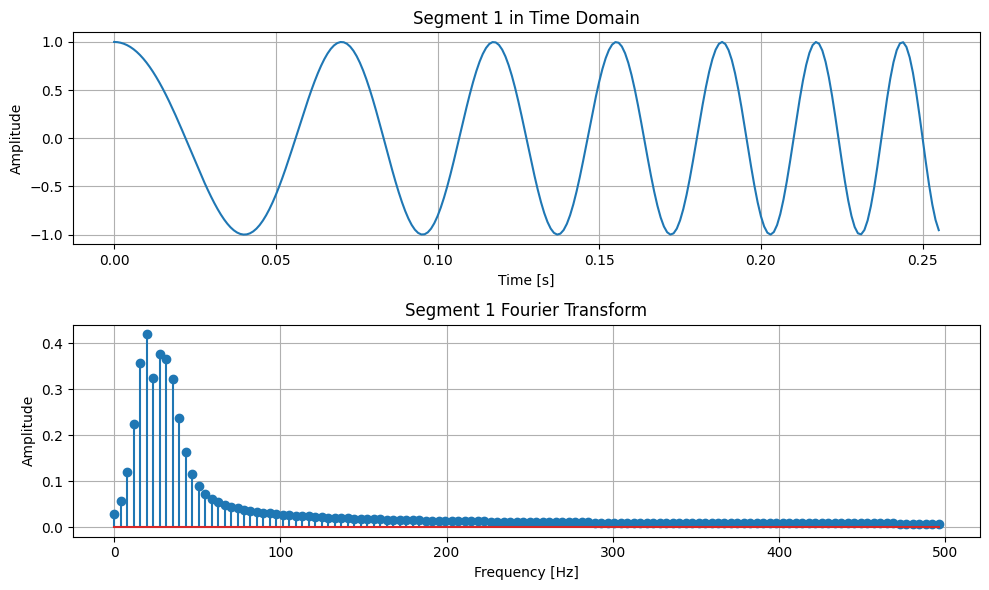

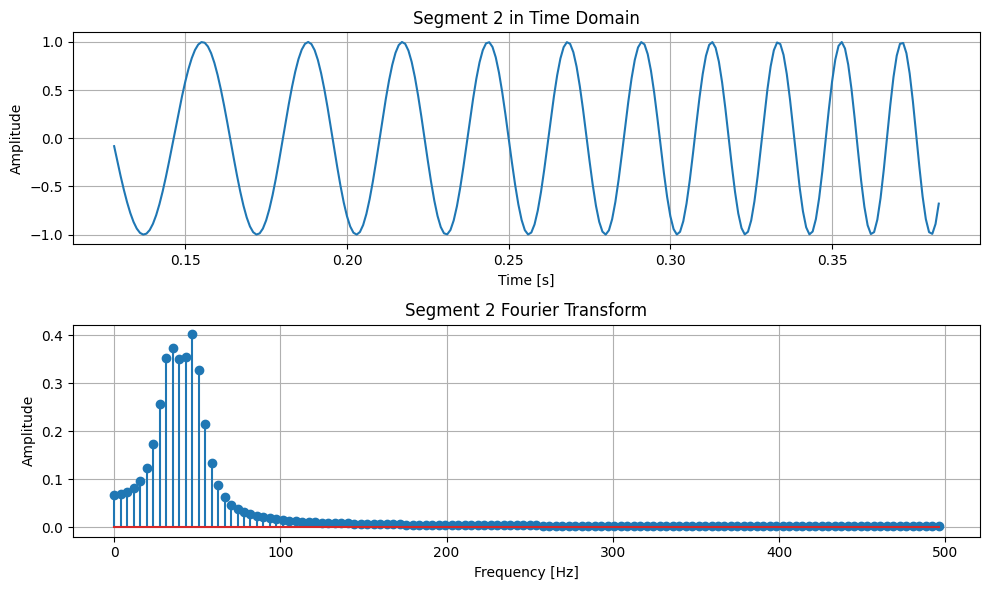

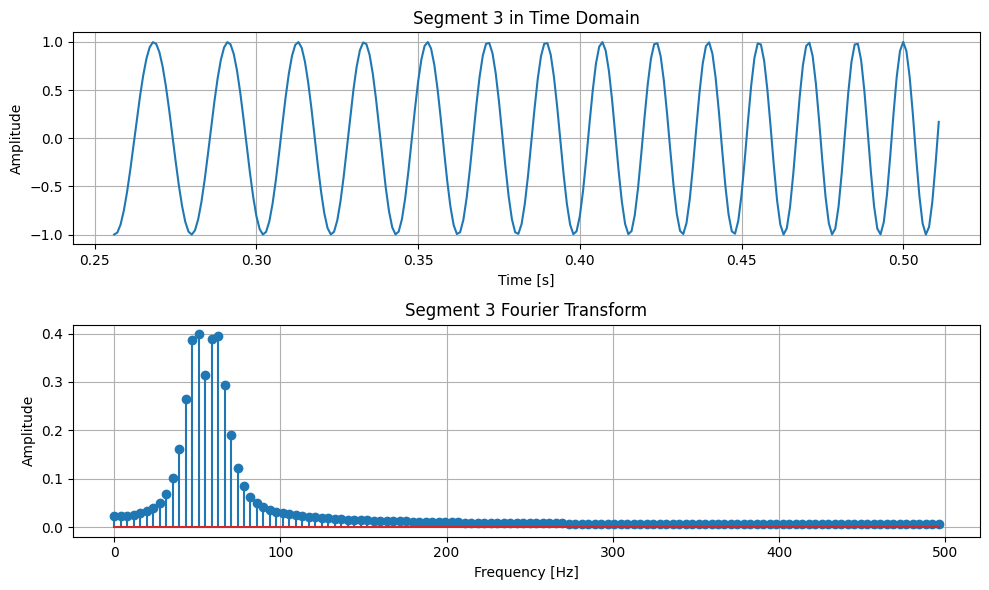

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp, stft
from scipy.fft import fft, fftfreq

# Define the chirp signal
def chirp_signal(t, f0, f1, t1):
    return chirp(t, f0=f0, f1=f1, t1=t1, method='linear')

# Parameters
fs = 1000  # Sampling frequency (1000 samples per second)
t = np.arange(0, 2, 1/fs)  # Time array over 2 seconds
f0 = 10  # Initial frequency of the chirp
f1 = 250  # Final frequency of the chirp
t1 = 2  # Time at which f1 is reached

# Generate the chirp signal
chirp_signal = chirp_signal(t, f0, f1, t1)

# Short-Time Fourier Transform
window = 'hann'  # Window type
nperseg = 256  # Length of each segment
noverlap = nperseg // 2  # Number of points to overlap between segments

frequencies, times, Zxx = stft(chirp_signal, fs, window=window, nperseg=nperseg, noverlap=noverlap)

# Plotting
plt.figure(figsize=(12, 14))

# Original signal
plt.subplot(4, 1, 1)
plt.plot(t, chirp_signal)
plt.title('Original Signal (Chirp)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# STFT spectrogram
plt.subplot(4, 1, 2)
plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Magnitude')
plt.grid(True)

# Analyze individual segments
segment_indices = [0, 1, 2]  # Indices of segments to analyze

for i, seg_idx in enumerate(segment_indices):
    start_idx = seg_idx * (nperseg - noverlap)
    end_idx = start_idx + nperseg
    segment = chirp_signal[start_idx:end_idx]
    segment_t = t[start_idx:end_idx]
    
    # Fourier Transform of the segment
    segment_f_transform = fft(segment)
    segment_freqs = fftfreq(nperseg, 1/fs)
    segment_amplitude = np.abs(segment_f_transform) / nperseg * 2  # Normalize
    
    # Plot the segment
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(segment_t, segment)
    plt.title(f'Segment {seg_idx + 1} in Time Domain')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    
    # Plot the Fourier Transform of the segment
    plt.subplot(2, 1, 2)
    plt.stem(segment_freqs[:nperseg//2], segment_amplitude[:nperseg//2])
    plt.title(f'Segment {seg_idx + 1} Fourier Transform')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


ValueError: num must be an integer with 1 <= num <= 15, not 18

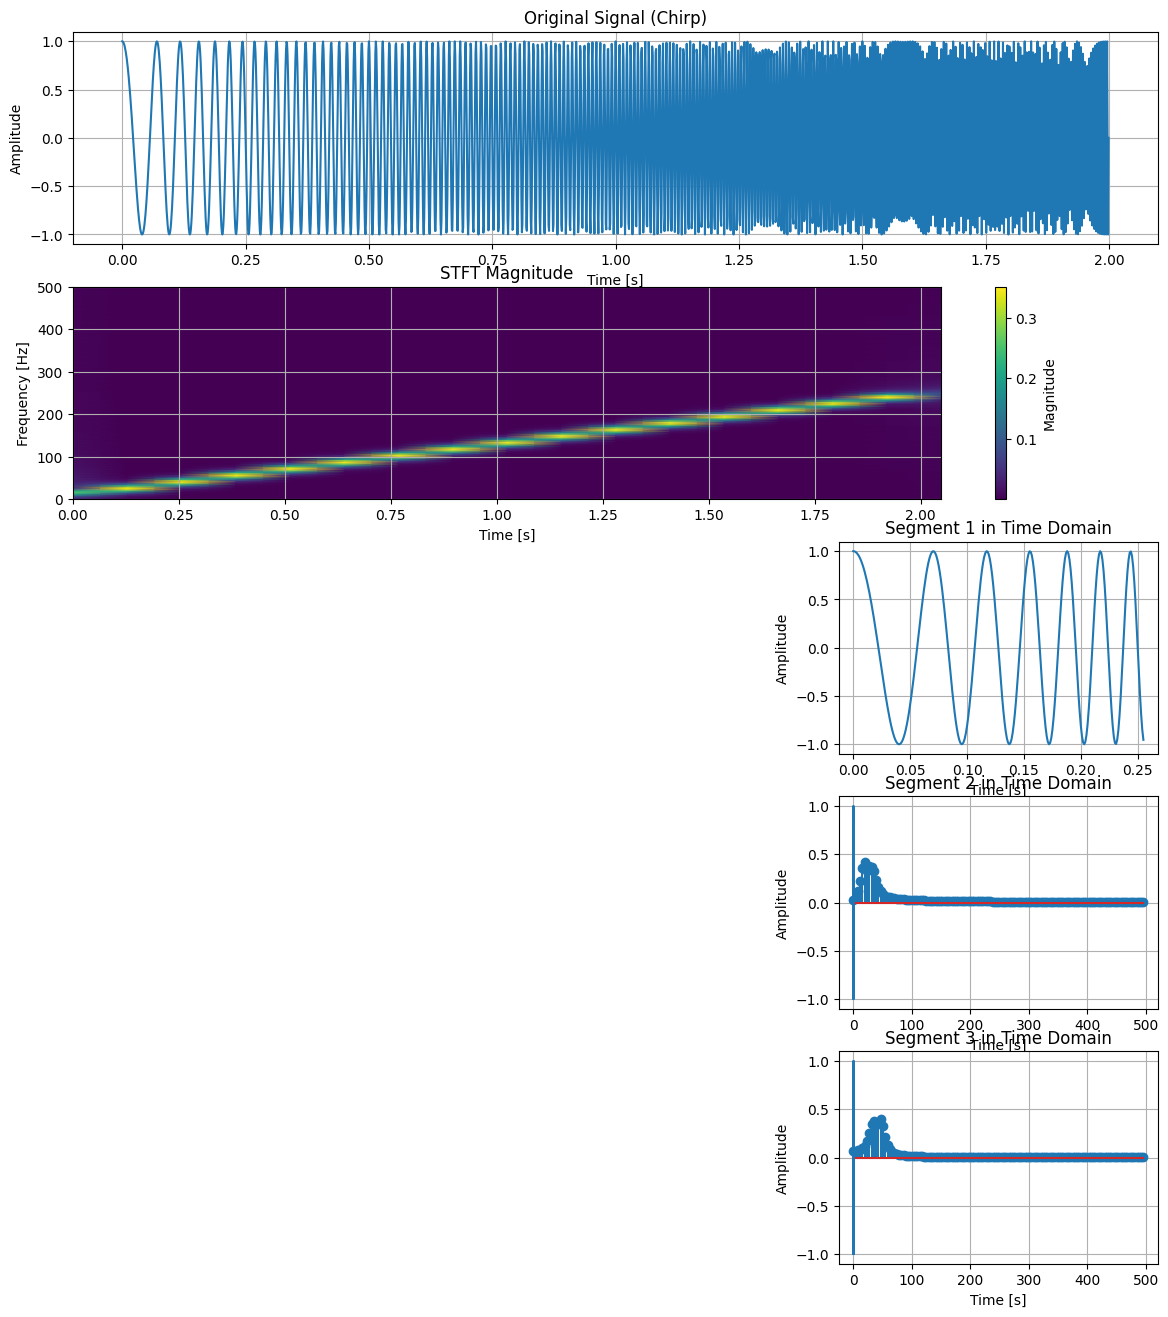

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp, stft
from scipy.fft import fft, fftfreq

# Define the chirp signal
def chirp_signal(t, f0, f1, t1):
    return chirp(t, f0=f0, f1=f1, t1=t1, method='linear')

# Parameters
fs = 1000  # Sampling frequency (1000 samples per second)
t = np.arange(0, 2, 1/fs)  # Time array over 2 seconds
f0 = 10  # Initial frequency of the chirp
f1 = 250  # Final frequency of the chirp
t1 = 2  # Time at which f1 is reached

# Generate the chirp signal
chirp_signal = chirp_signal(t, f0, f1, t1)

# Short-Time Fourier Transform
window = 'hann'  # Window type
nperseg = 256  # Length of each segment
noverlap = nperseg // 2  # Number of points to overlap between segments

frequencies, times, Zxx = stft(chirp_signal, fs, window=window, nperseg=nperseg, noverlap=noverlap)

# Plotting
plt.figure(figsize=(14, 16))

# Original signal
plt.subplot(5, 1, 1)
plt.plot(t, chirp_signal)
plt.title('Original Signal (Chirp)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# STFT spectrogram
plt.subplot(5, 1, 2)
plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Magnitude')
plt.grid(True)

# Analyze individual segments
segment_indices = [0, 1, 2]  # Indices of segments to analyze

for i, seg_idx in enumerate(segment_indices):
    start_idx = seg_idx * (nperseg - noverlap)
    end_idx = start_idx + nperseg
    segment = chirp_signal[start_idx:end_idx]
    segment_t = t[start_idx:end_idx]
    
    # Fourier Transform of the segment
    segment_f_transform = fft(segment)
    segment_freqs = fftfreq(nperseg, 1/fs)
    segment_amplitude = np.abs(segment_f_transform) / nperseg * 2  # Normalize
    
    # Plot the segment in time domain
    plt.subplot(5, len(segment_indices), len(segment_indices) * (3 + i))
    plt.plot(segment_t, segment)
    plt.title(f'Segment {seg_idx + 1} in Time Domain')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    
    # Plot the Fourier Transform of the segment
    plt.subplot(5, len(segment_indices), len(segment_indices) * (4 + i))
    plt.stem(segment_freqs[:nperseg//2], segment_amplitude[:nperseg//2])
    plt.title(f'Segment {seg_idx + 1} Fourier Transform')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.grid(True)

plt.tight_layout()
plt.show()


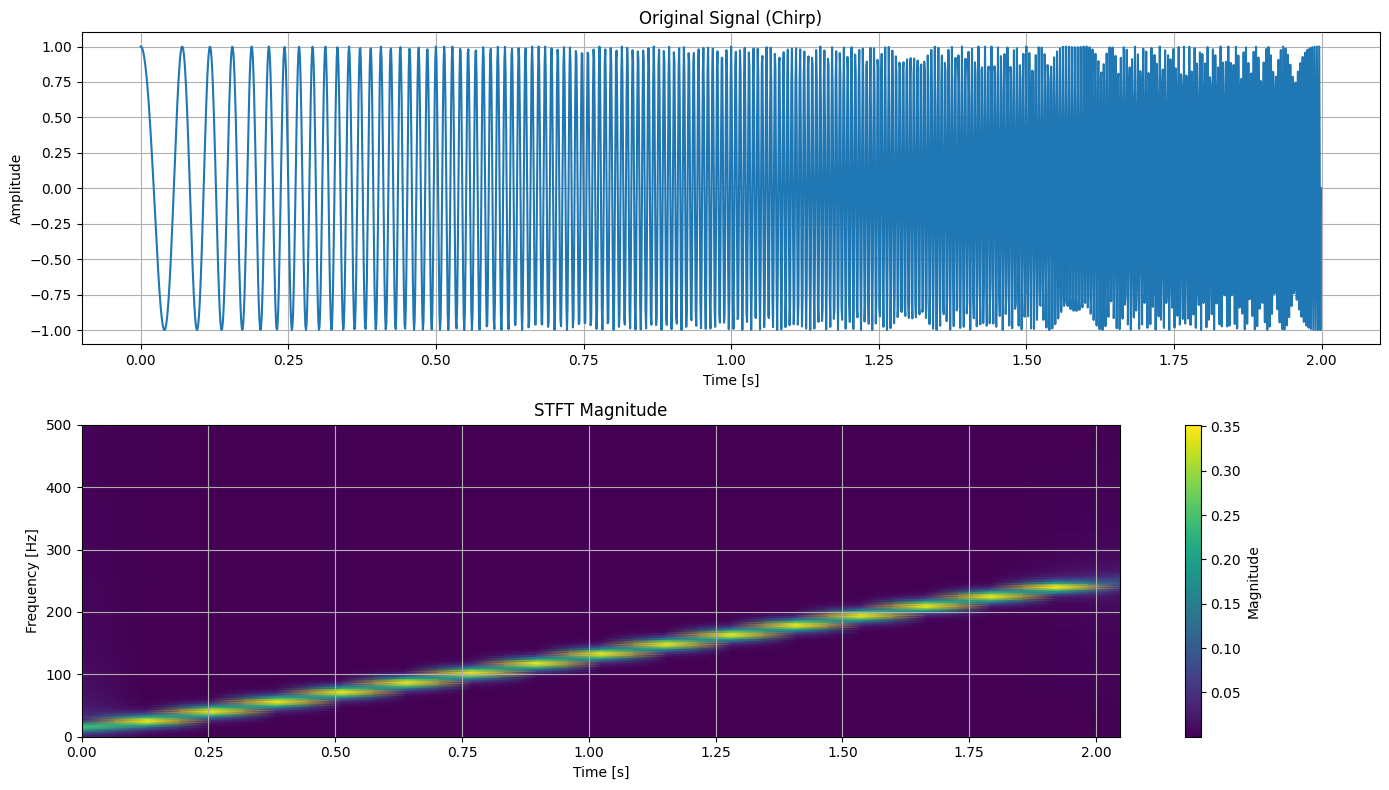

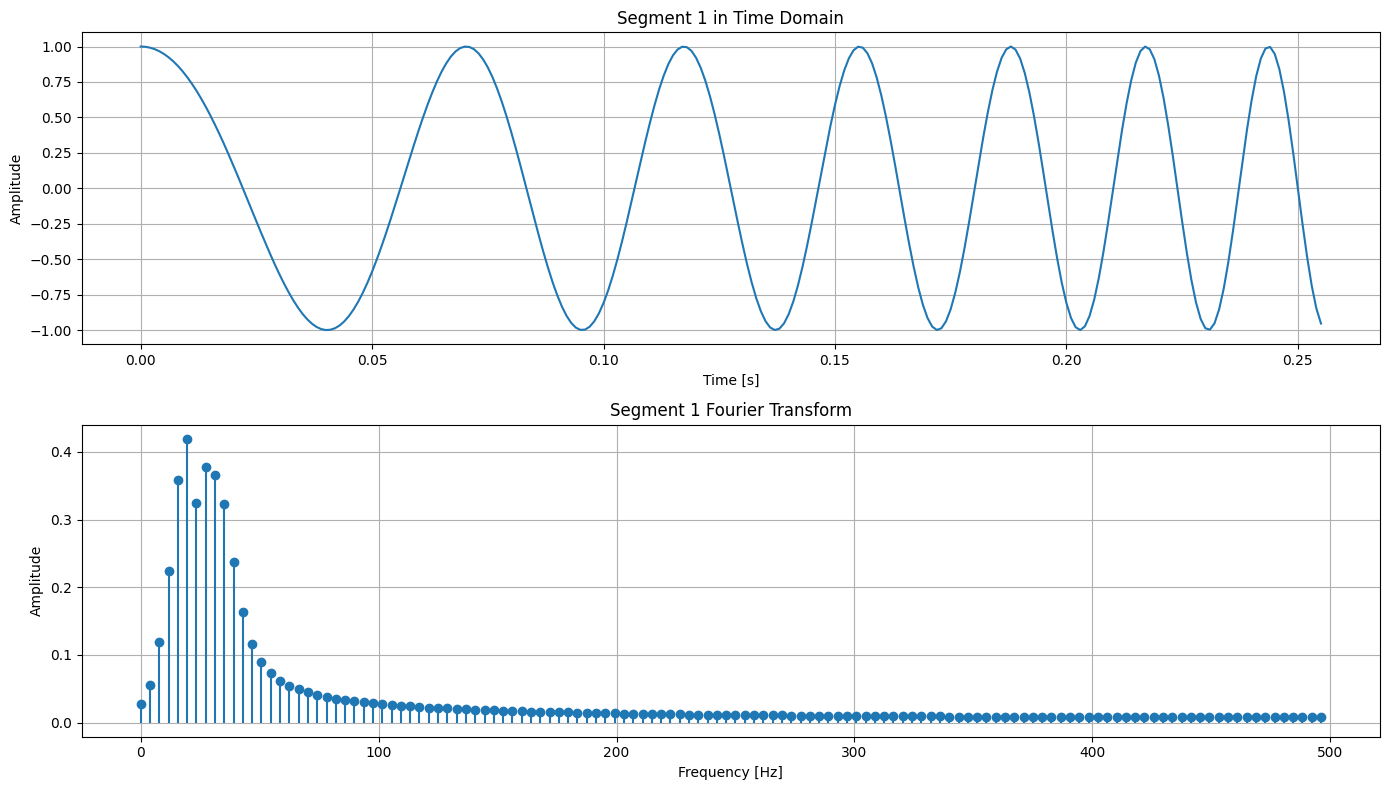

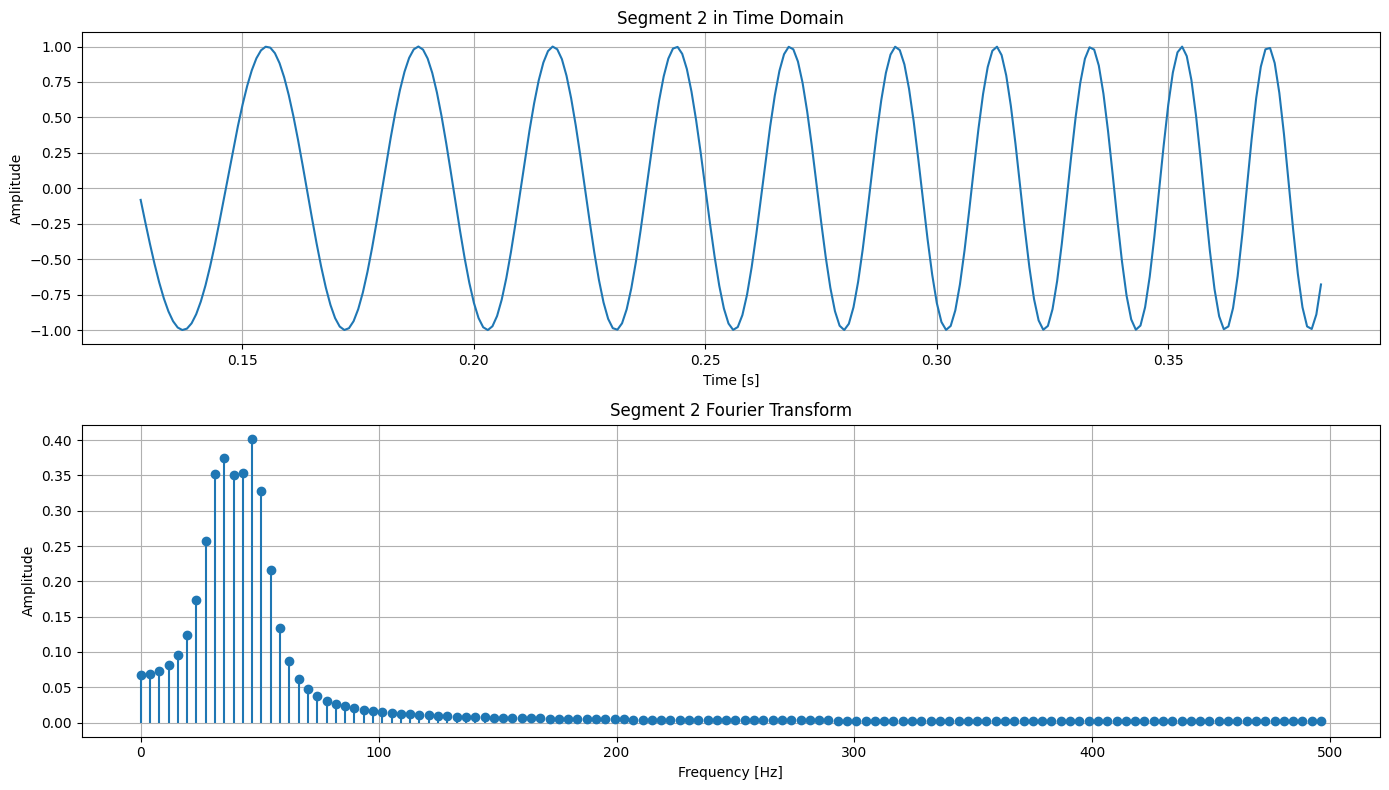

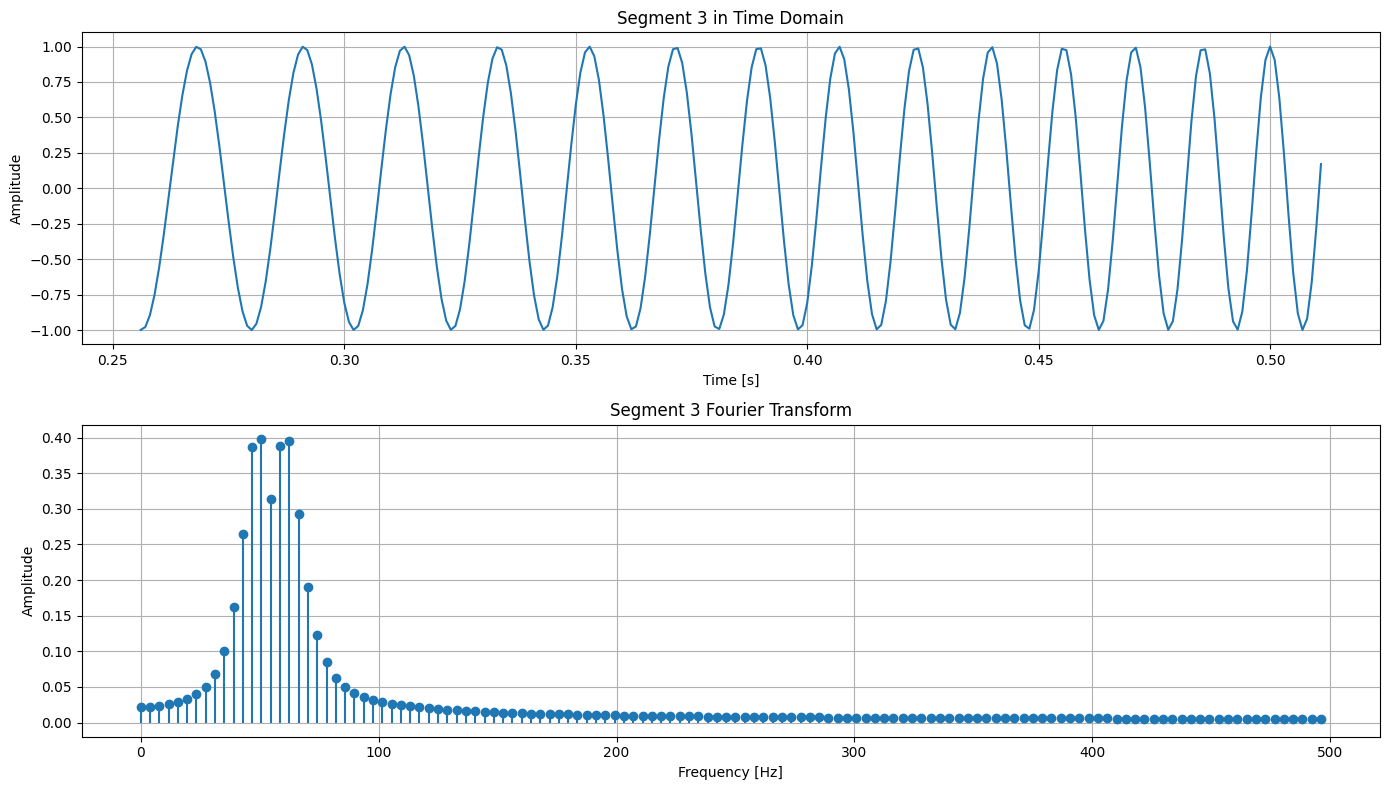

In [11]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp, stft
from scipy.fft import fft, fftfreq

# Define the chirp signal
def chirp_signal(t, f0, f1, t1):
    return chirp(t, f0=f0, f1=f1, t1=t1, method='linear')

# Parameters
fs = 1000  # Sampling frequency (1000 samples per second)
t = np.arange(0, 2, 1/fs)  # Time array over 2 seconds
f0 = 10  # Initial frequency of the chirp
f1 = 250  # Final frequency of the chirp
t1 = 2  # Time at which f1 is reached

# Generate the chirp signal
chirp_signal = chirp_signal(t, f0, f1, t1)

# Short-Time Fourier Transform
window = 'hann'  # Window type
nperseg = 256  # Length of each segment
noverlap = nperseg // 2  # Number of points to overlap between segments

frequencies, times, Zxx = stft(chirp_signal, fs, window=window, nperseg=nperseg, noverlap=noverlap)

# Plotting
plt.figure(figsize=(14, 8))

# Original signal
plt.subplot(2, 1, 1)
plt.plot(t, chirp_signal)
plt.title('Original Signal (Chirp)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# STFT spectrogram
plt.subplot(2, 1, 2)
plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()

# Analyze individual segments
segment_indices = [0, 1, 2]  # Indices of segments to analyze

for seg_idx in segment_indices:
    start_idx = seg_idx * (nperseg - noverlap)
    end_idx = start_idx + nperseg
    segment = chirp_signal[start_idx:end_idx]
    segment_t = t[start_idx:end_idx]
    
    # Fourier Transform of the segment
    segment_f_transform = fft(segment)
    segment_freqs = fftfreq(nperseg, 1/fs)
    segment_amplitude = np.abs(segment_f_transform) / nperseg * 2  # Normalize
    
    # Plot the segment and its Fourier Transform
    plt.figure(figsize=(14, 8))
    
    # Plot the segment in time domain
    plt.subplot(2, 1, 1)
    plt.plot(segment_t, segment)
    plt.title(f'Segment {seg_idx + 1} in Time Domain')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    
    # Plot the Fourier Transform of the segment
    plt.subplot(2, 1, 2)
    plt.stem(segment_freqs[:nperseg//2], segment_amplitude[:nperseg//2], basefmt=" ")
    plt.title(f'Segment {seg_idx + 1} Fourier Transform')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()



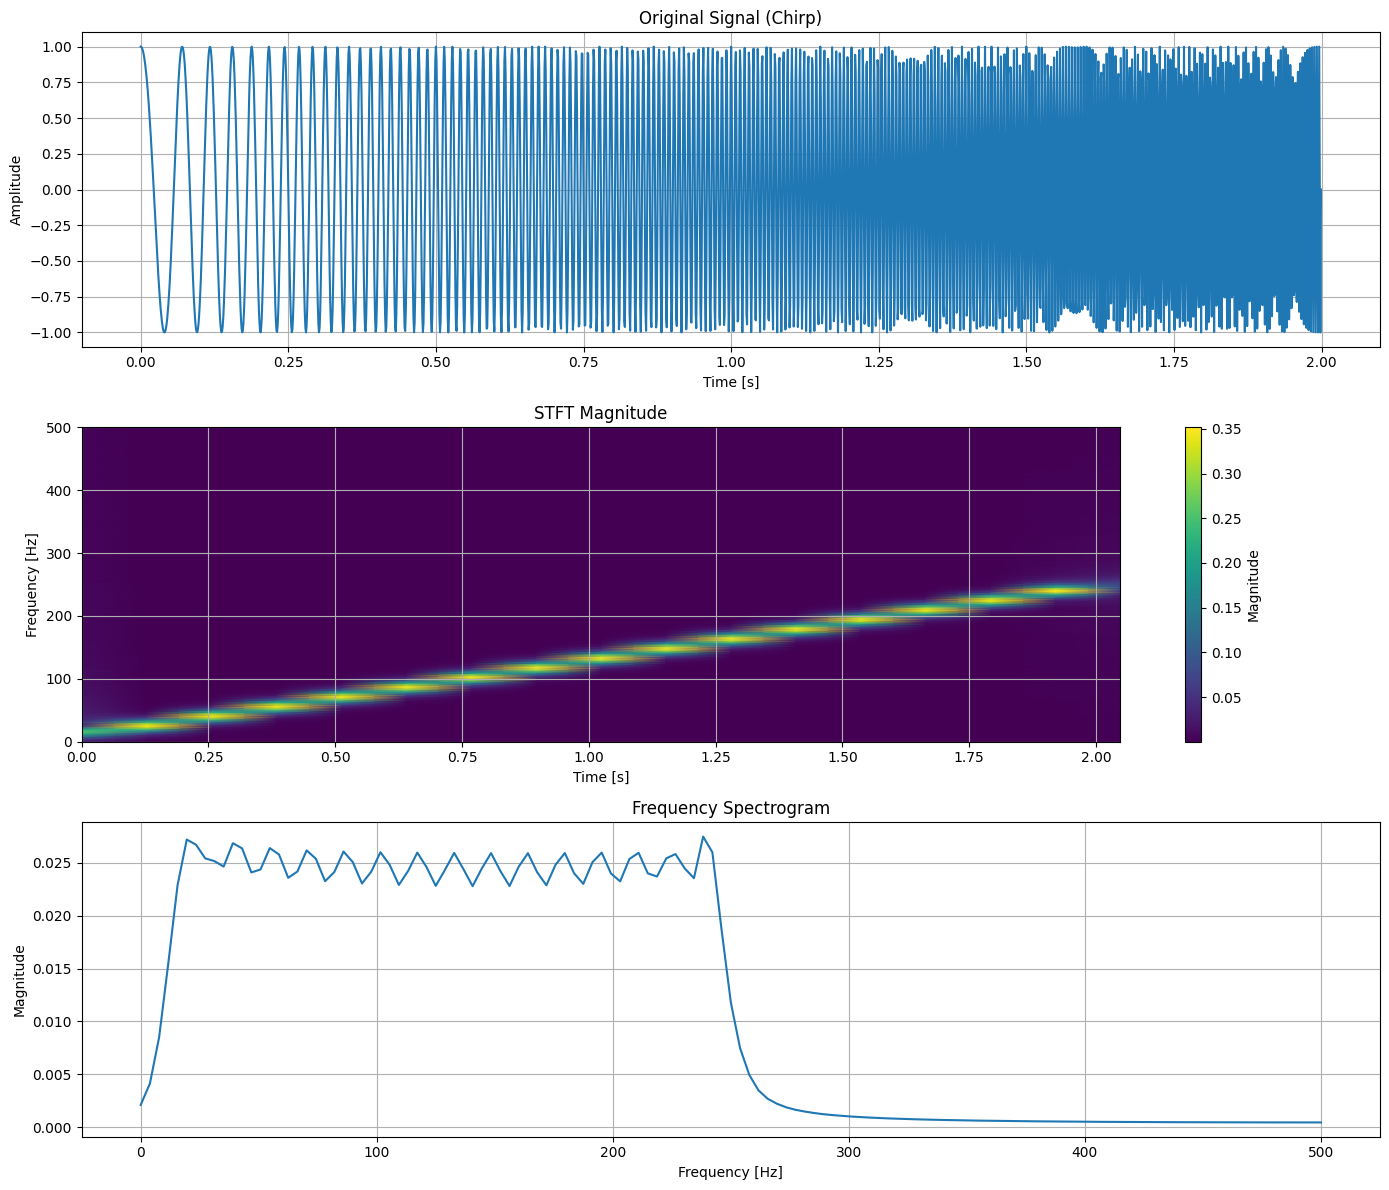

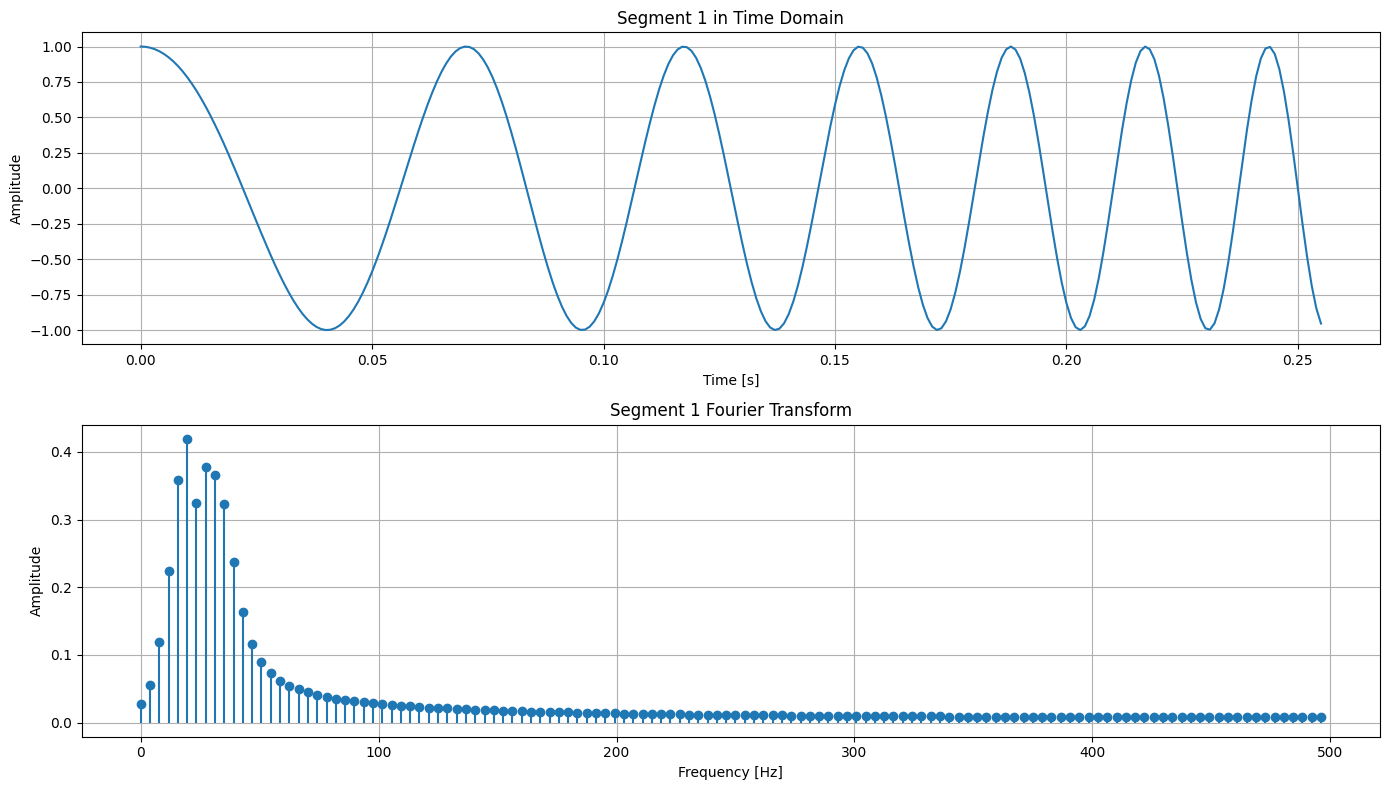

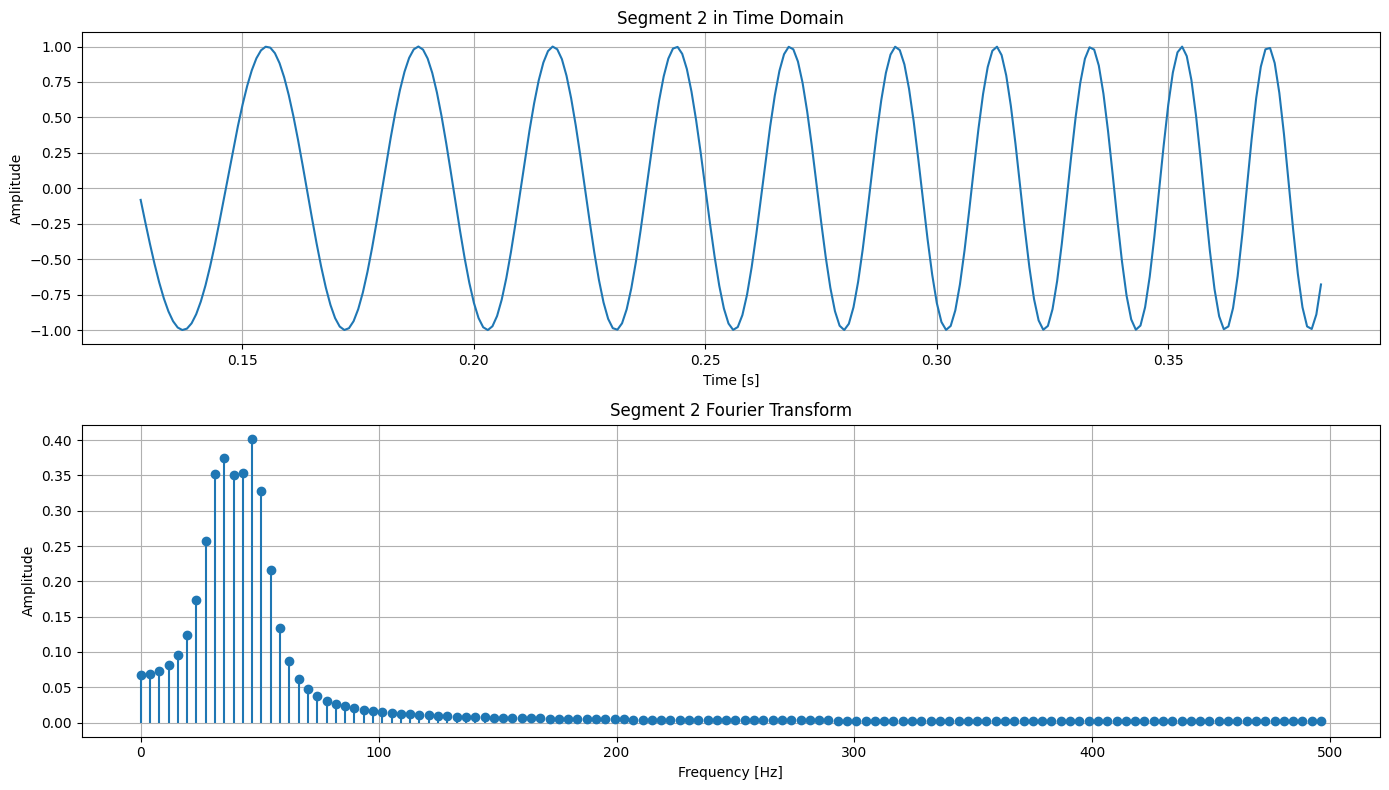

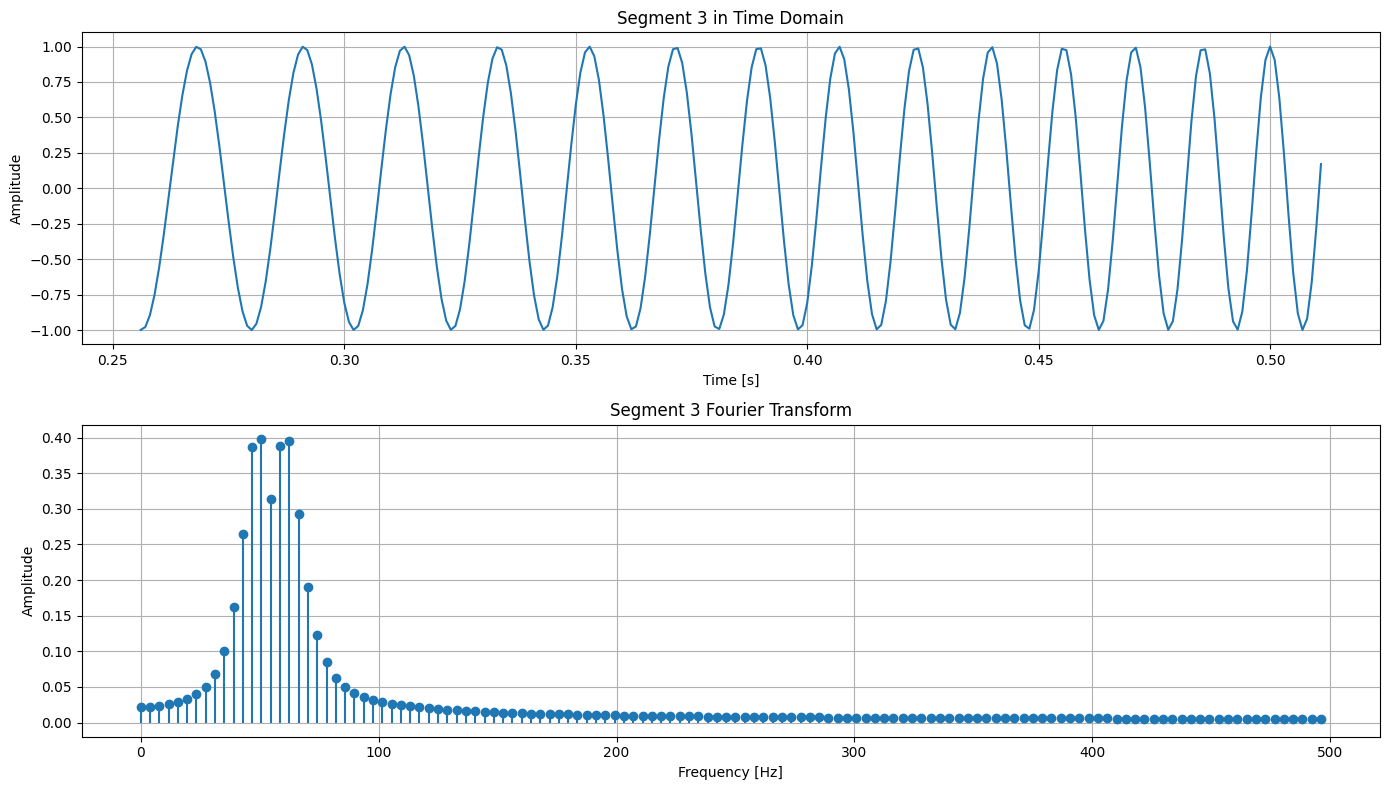

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp, stft
from scipy.fft import fft, fftfreq

# Define the chirp signal
def chirp_signal(t, f0, f1, t1):
    return chirp(t, f0=f0, f1=f1, t1=t1, method='linear')

# Parameters
fs = 1000  # Sampling frequency (1000 samples per second)
t = np.arange(0, 2, 1/fs)  # Time array over 2 seconds
f0 = 10  # Initial frequency of the chirp
f1 = 250  # Final frequency of the chirp
t1 = 2  # Time at which f1 is reached

# Generate the chirp signal
chirp_signal = chirp_signal(t, f0, f1, t1)

# Short-Time Fourier Transform
window = 'hann'  # Window type
nperseg = 256  # Length of each segment
noverlap = nperseg // 2  # Number of points to overlap between segments

frequencies, times, Zxx = stft(chirp_signal, fs, window=window, nperseg=nperseg, noverlap=noverlap)

# Compute the frequency spectrogram
freq_spectrogram = np.abs(Zxx).mean(axis=1)

# Plotting
plt.figure(figsize=(14, 12))

# Original signal
plt.subplot(3, 1, 1)
plt.plot(t, chirp_signal)
plt.title('Original Signal (Chirp)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# STFT spectrogram
plt.subplot(3, 1, 2)
plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Magnitude')
plt.grid(True)

# Frequency spectrogram
plt.subplot(3, 1, 3)
plt.plot(frequencies, freq_spectrogram)
plt.title('Frequency Spectrogram')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()

# Analyze individual segments
segment_indices = [0, 1, 2]  # Indices of segments to analyze

for seg_idx in segment_indices:
    start_idx = seg_idx * (nperseg - noverlap)
    end_idx = start_idx + nperseg
    segment = chirp_signal[start_idx:end_idx]
    segment_t = t[start_idx:end_idx]
    
    # Fourier Transform of the segment
    segment_f_transform = fft(segment)
    segment_freqs = fftfreq(nperseg, 1/fs)
    segment_amplitude = np.abs(segment_f_transform) / nperseg * 2  # Normalize
    
    # Plot the segment and its Fourier Transform
    plt.figure(figsize=(14, 8))
    
    # Plot the segment in time domain
    plt.subplot(2, 1, 1)
    plt.plot(segment_t, segment)
    plt.title(f'Segment {seg_idx + 1} in Time Domain')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    
    # Plot the Fourier Transform of the segment
    plt.subplot(2, 1, 2)
    plt.stem(segment_freqs[:nperseg//2], segment_amplitude[:nperseg//2], basefmt=" ")
    plt.title(f'Segment {seg_idx + 1} Fourier Transform')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
